We have seen in the previous notebook that we easily find the three groups performing a K-Means clustering for N=3:

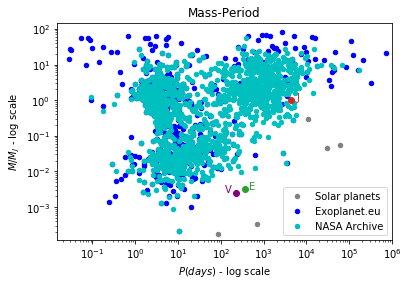

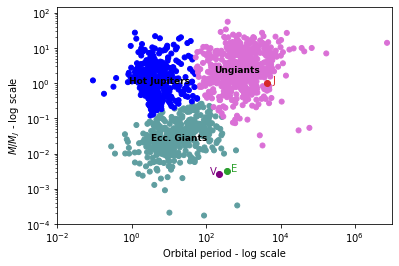

In [117]:
%run file_1.ipynb

A question remains: should we use standardization or normalization? Let's find out!
1. How do these processes affect our data?

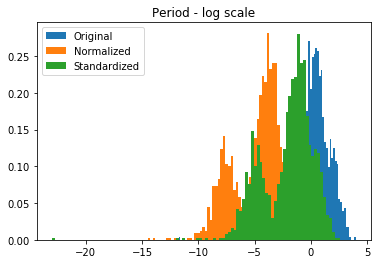

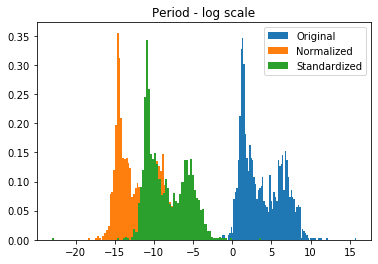

In [112]:
data_norm, data_stnd = exo_sol(file_US,param_MP,norm=True), exo_sol(file_US, param_MP,stnd=True)
#Standardization focuses the distribution in 0 -- not good for log. Has negative values.
#So I shift it.
#I add a small value to the normalized data aswell because the original min is 0

data_stnd[:,0]=data_stnd[:,0]-np.min(data_stnd[:,0])+1e-10
data_stnd[:,1]=data_stnd[:,1]-np.min(data_stnd[:,1])+1e-10
data_norm[:,1]=data_norm[:,1]+1e-10
data_norm[:,0]=data_norm[:,0]+1e-10

M_norm, P_norm = data_norm[:,1], data_norm[:,0]
M_stnd, P_stnd = data_stnd[:,1], data_stnd[:,0]

names = ["Original", "Normalized", "Standardized"]
masses = [M,M_norm, M_stnd]
periods = [P, P_norm, P_stnd]

for i in range(3):
    plt.hist(np.log(masses[i]),100,label=names[i],density=True)
    plt.title("Period - log scale") 
    plt.legend()
plt.show()

for i in range(3):
    plt.hist(np.log(periods[i]),100,label=names[i],density=True)
    plt.title("Period - log scale") 
    plt.legend()
plt.show()

2. Performing K-Means on the transformed data

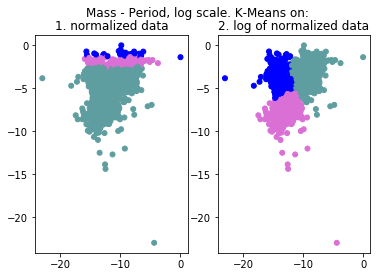

In [113]:
#on normalized data
kmeans_norm = KMeans(n_clusters=3).fit(data_norm)
kmeans_norm_log = KMeans(n_clusters=3).fit(np.log(data_norm))

centroids_norm, labels_norm = kmeans_norm.cluster_centers_, kmeans_norm.labels_
centroids_norm_log, labels_norm_log = kmeans_norm_log.cluster_centers_, kmeans_norm_log.labels_
colors=['cadetblue','b','orchid']
label_color, label_color_log = [], []
for l in labels_norm:
    label_color=np.append(label_color,colors[l])
for l in labels_norm_log:
    label_color_log=np.append(label_color_log,colors[l])

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(np.log(P_norm), np.log(M_norm), c=label_color, s=25)
ax1.set_title('1. normalized data')
ax2.scatter(np.log(P_norm), np.log(M_norm), c=label_color_log, s=25)
ax2.set_title('2. log of normalized data')
plt.suptitle("Mass - Period, log scale. K-Means on:") 
plt.show()

P max =  38.45665381546822 M max =  13.622327391509614


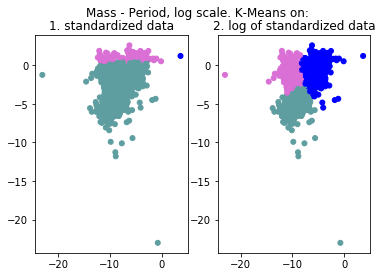

In [114]:
print("P max = ",np.max(data_stnd[:,0]),"M max = ",np.max(data_stnd[:,1]))

kmeans_stnd = KMeans(n_clusters=3).fit(data_stnd)
kmeans_stnd_log = KMeans(n_clusters=3).fit(np.log(data_stnd))

centroids_stnd, labels_stnd = kmeans_stnd.cluster_centers_, kmeans_stnd.labels_
centroids_stnd_log, labels_stnd_log = kmeans_stnd_log.cluster_centers_, kmeans_stnd_log.labels_

label_color, label_color_log = [], []
for l in labels_stnd:
    label_color=np.append(label_color,colors[l])
for l in labels_stnd_log:
    label_color_log=np.append(label_color_log,colors[l])

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(np.log(P_stnd), np.log(M_stnd), c=label_color, s=25)
ax1.set_title('1. standardized data')
ax2.scatter(np.log(P_stnd), np.log(M_stnd), c=label_color_log, s=25)
ax2.set_title('2. log of standardized data')
plt.suptitle("Mass - Period, log scale. K-Means on:") 
plt.show()

## elbow method on the three cases

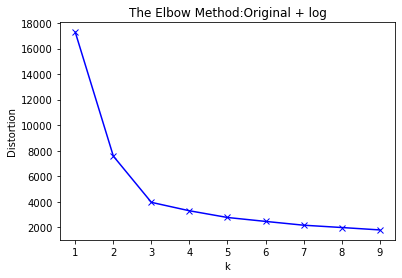

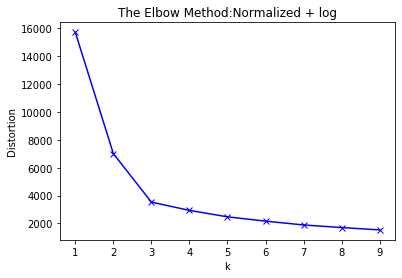

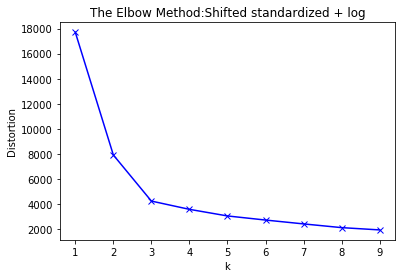

In [55]:
    distortions, distortions_stnd, distortions_norm = [],[],[]
    Ds = [distortions, distortions_stnd, distortions_norm]
    names =["Original + log", "Normalized + log", "Shifted standardized + log"]
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(np.log(data_MP))
        distortions.append(kmeanModel.inertia_)
        kmeanModel.fit(np.log(data_norm))
        distortions_norm.append(kmeanModel.inertia_)
        kmeanModel.fit(np.log(data_stnd))
        distortions_stnd.append(kmeanModel.inertia_)
    
    for i,d in enumerate(Ds):
        plt.plot(K, d, 'bx-')
        plt.xlabel('k')
        plt.ylabel('Distortion')
        plt.title('The Elbow Method:'+names[i])
        plt.show()

## Making sense of our results -- parallel coordinates plot

In [115]:
kmeans = KMeans(n_clusters=3).fit(np.log(data_MP))
centroids, labels = kmeans.cluster_centers_, kmeans.labels_

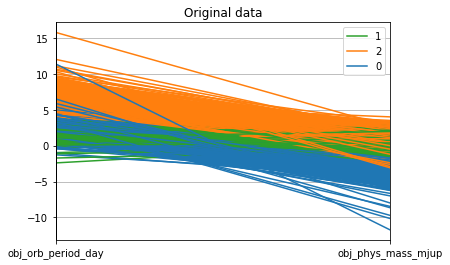

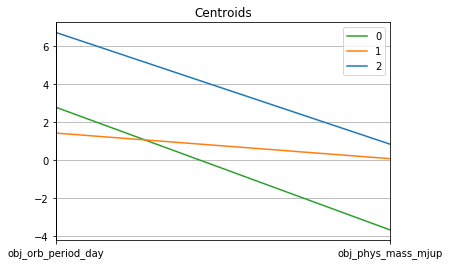

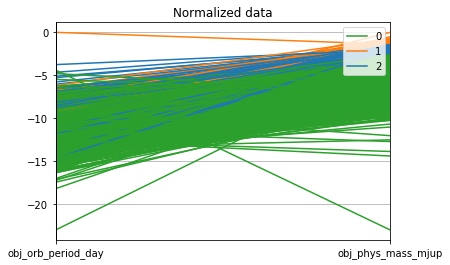

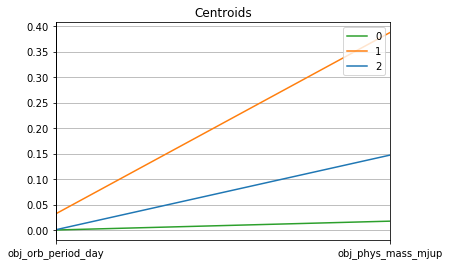

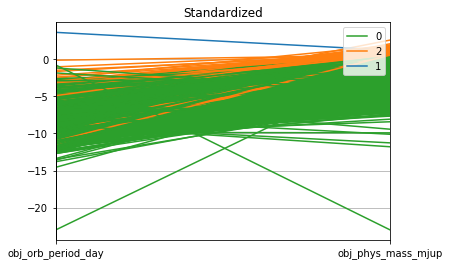

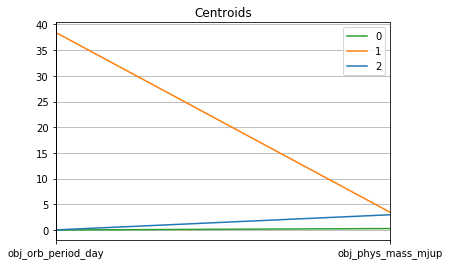

In [116]:
X = pd.DataFrame(np.log(data_MP), index=data_MP.index, columns=data_MP.columns)
X_norm = pd.DataFrame(np.log(data_norm), index=data_MP.index, columns=data_MP.columns)
X_stnd = pd.DataFrame(np.log(data_stnd), index=data_MP.index, columns=data_MP.columns)
X["cluster"], X_norm["cluster"], X_stnd["cluster"] = labels, labels_norm, labels_stnd

cents = pd.DataFrame(kmeans.cluster_centers_, columns=data_MP.columns)
cents_norm = pd.DataFrame(kmeans_norm.cluster_centers_, columns=data_MP.columns)
cents_stnd = pd.DataFrame(kmeans_stnd.cluster_centers_, columns=data_MP.columns)
cents['cluster'], cents_norm['cluster'], cents_stnd['cluster'] = cents.index,cents_norm.index,cents_stnd.index

colors=['tab:green','tab:orange','tab:blue']
Xs, Cs = [X,X_norm,X_stnd], [cents,cents_norm,cents_stnd]
names = ["Original data", "Normalized data", "Standardized"]
for i in range(3):
    pd.plotting.parallel_coordinates(Xs[i],class_column='cluster',color=colors,cols=['obj_orb_period_day','obj_phys_mass_mjup'])
    plt.title(names[i])
    plt.show()
    pd.plotting.parallel_coordinates(Cs[i],class_column='cluster',color=colors,cols=['obj_orb_period_day','obj_phys_mass_mjup'])
    plt.title("Centroids")
    plt.show()